**Clone Git**

In [1]:
!git clone https://github.com/jadidimohammad/dataanalysis.git

Cloning into 'dataanalysis'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 7.37 MiB | 14.95 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [5]:
!unrar x '/content/dataanalysis/housing_data.rar'


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/dataanalysis/housing_data.rar

Extracting  housing_data.csv                                              54%100%  OK 
All OK


use encoding='gbk' to encode Chinease character
use low_memory=False to control whether Pandas should read the CSV file in chunks or load the entire file into memory at once.

In [10]:
import pandas as pd
housing = pd.read_csv('housing_data.csv', encoding='gbk',low_memory=False)

dataset includes more than 318000 records and 22 features (column)

In [11]:
housing.shape

(318851, 22)

see 5 record

In [12]:
housing.head(5)

,Unnamed: 0,url,id,Lng,Lat,Cid,tradeTime,DOM,totalPrice,square,...,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,415.0,131.00,...,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,575.0,132.38,...,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,1030.0,198.00,...,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,297.5,134.00,...,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,392.0,81.00,...,1,1,中 6,1960,2,2,0.333,0.0,1.0,1


we delete unuseful columns

In [13]:
housing_dropped = housing.drop(columns=['id','Cid','url','Unnamed: 0'])

we create a column to save missing value counts

In [14]:
housing_null = pd.DataFrame(columns=['0'],index=housing_dropped.columns)
housing_null['0']=housing_dropped.isna().sum()

visualize DOM column

<Axes: >

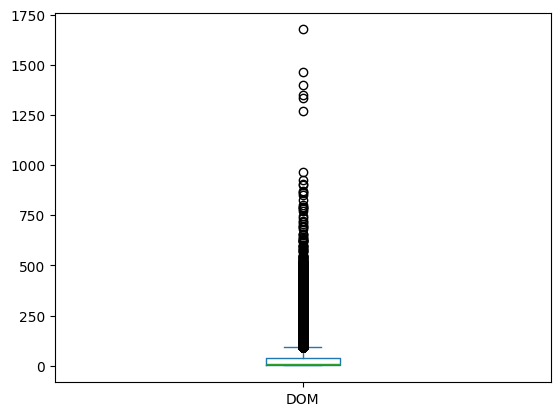

In [15]:
housing_dropped.DOM.plot(kind = 'box')

In [16]:
housing_no_missing = housing_dropped.copy()

In [17]:
housing_no_missing['DOM'] = housing_no_missing['DOM'].fillna(housing_no_missing['DOM'].mode())
housing_no_missing.dropna(subset=['elevator', 'subway'], inplace=True)

In [18]:
housing_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318819 entries, 0 to 318850
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  160849 non-null  float64
 4   totalPrice           318819 non-null  float64
 5   square               318819 non-null  float64
 6   livingRoom           318819 non-null  object 
 7   drawingRoom          318819 non-null  object 
 8   kitchen              318819 non-null  int64  
 9   bathRoom             318819 non-null  object 
 10  floor                318819 non-null  object 
 11  constructionTime     318819 non-null  object 
 12  renovationCondition  318819 non-null  int64  
 13  buildingStructure    318819 non-null  int64  
 14  ladderRatio          318819 non-null  float64
 15  elevator             3

In [19]:
housing_no_missing.to_csv('housing_no_missing.csv', encoding='gbk', index=False)